In [ ]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
df.reset_index(inplace=True)
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL


In [ ]:
import pandas as pd

# Replace 'path_to_csv' with the actual path to the downloaded CSV file
df = pd.read_csv('/content/HistoricalQuotes.csv')

# Display the first few rows
df.head()


,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [ ]:
# Check raw column names
print(df.columns.tolist())



['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# Load dataset
df = pd.read_csv("HistoricalQuotes.csv")

#Missing values
print("\nMissing values:\n", df.isnull().sum())

# 1. Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

# 2. Convert price columns to numeric (remove $ sign)
price_cols = ['Close_Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# 3. Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# 4. Remove duplicate rows
df = df.drop_duplicates()

# 5. Detect outliers using z-score
z_scores = np.abs((df[price_cols] - df[price_cols].mean()) / df[price_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()} rows")

# 6. Normalize price columns
scaler = MinMaxScaler()
df[[col + '_Norm' for col in price_cols]] = scaler.fit_transform(df[price_cols])

# 7. Encode categorical variables (example logic)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    print(f"Encoding these categorical columns: {cat_cols}")
    for col in cat_cols:
        le = LabelEncoder()
        df[col + '_Label'] = le.fit_transform(df[col])

else:
    print("No categorical columns found to encode.")

# 8. Display result
print(df.head())



Missing values:
 Date           0
 Close/Last    0
 Volume        0
 Open          0
 High          0
 Low           0
dtype: int64
Outliers detected: 37 rows
No categorical columns found to encode.
        Date  Close_Last     Volume    Open    High     Low  Close_Last_Norm  \
0 2020-02-28      273.36  106721200  257.26  278.41  256.37         0.818943   
1 2020-02-27      273.52   80151380  281.10  286.00  272.96         0.819481   
2 2020-02-26      292.65   49678430  286.53  297.88  286.50         0.883813   
3 2020-02-25      288.08   57668360  300.95  302.53  286.13         0.868444   
4 2020-02-24      298.18   55548830  297.26  304.18  289.23         0.902409   

   Open_Norm  High_Norm  Low_Norm  
0   0.771523   0.834050  0.772861  
1   0.852242   0.859527  0.829120  
2   0.870627   0.899403  0.875036  
3   0.919451   0.915011  0.873782  
4   0.906957   0.920550  0.884294  


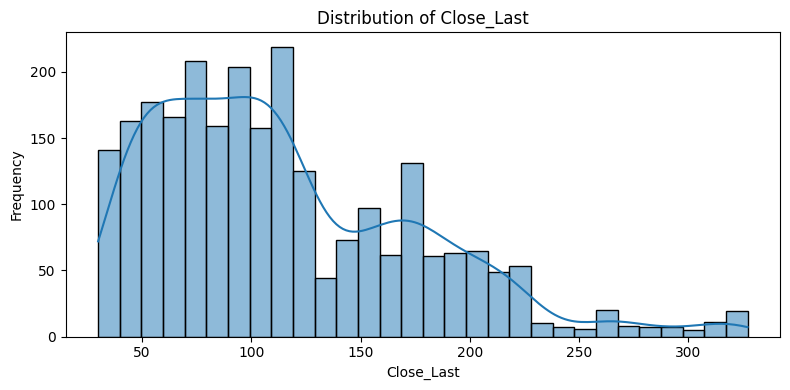

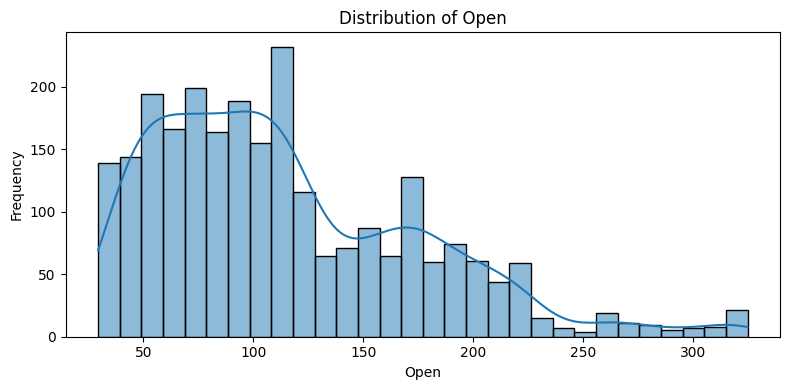

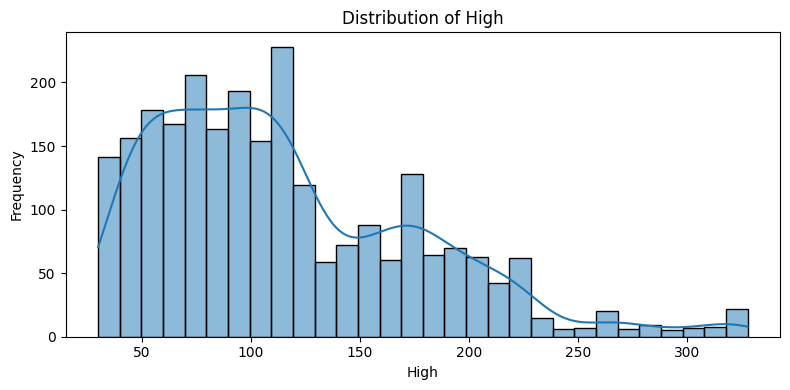

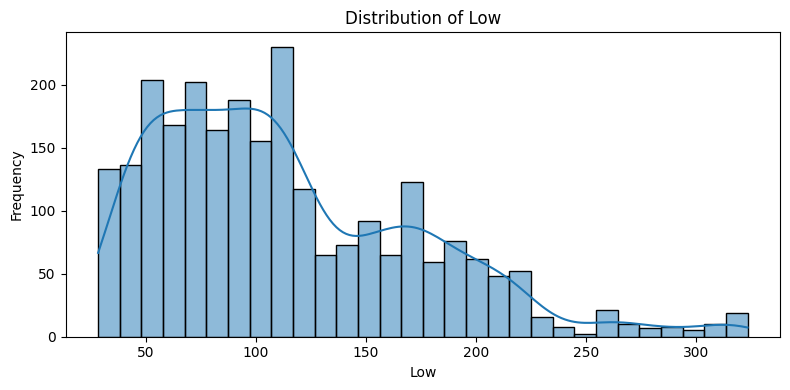

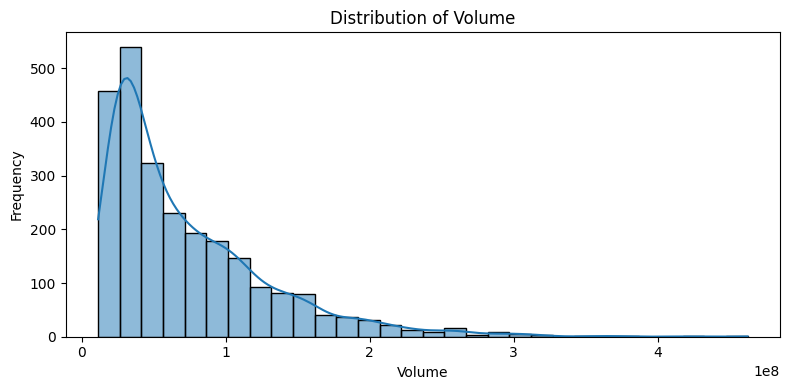

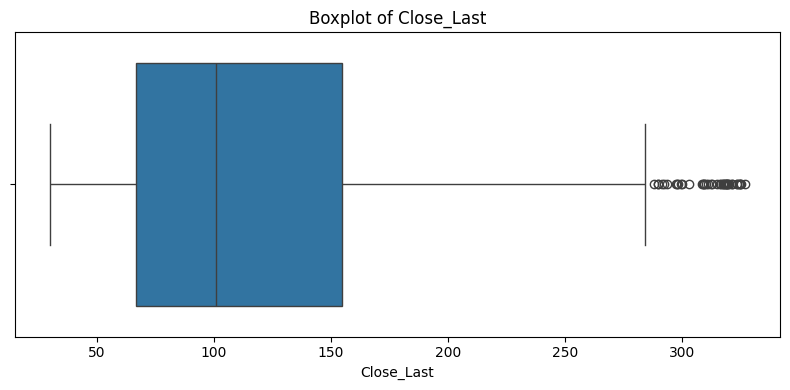

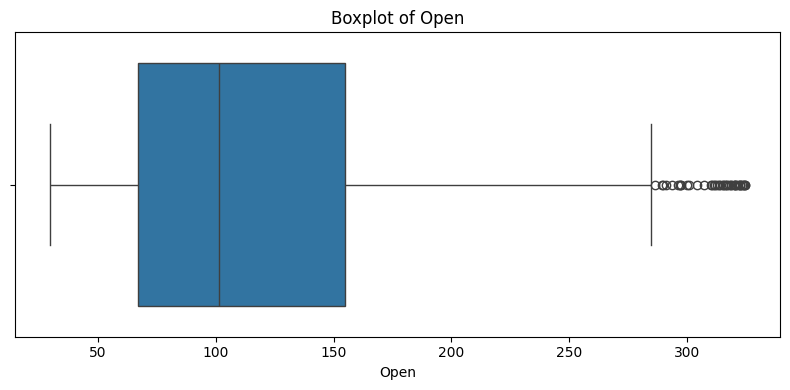

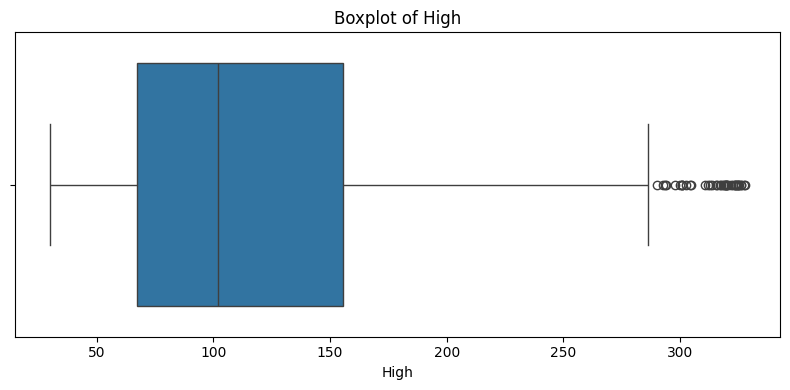

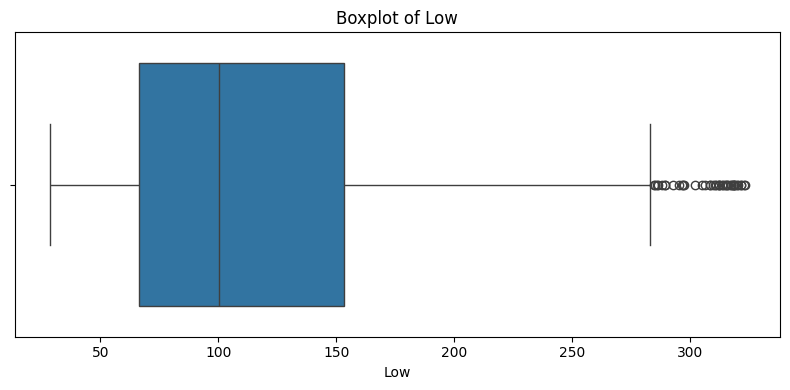

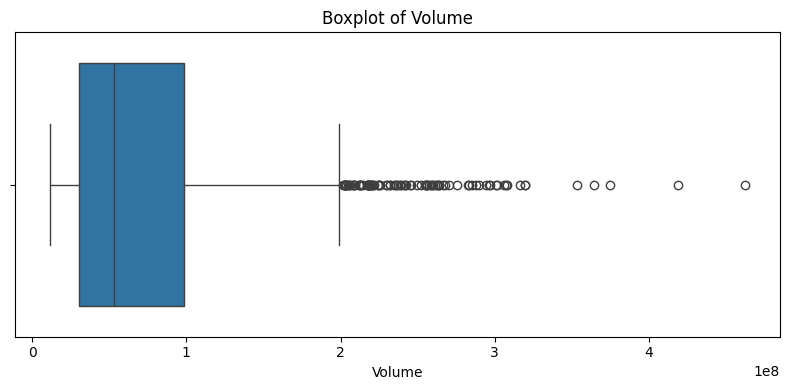

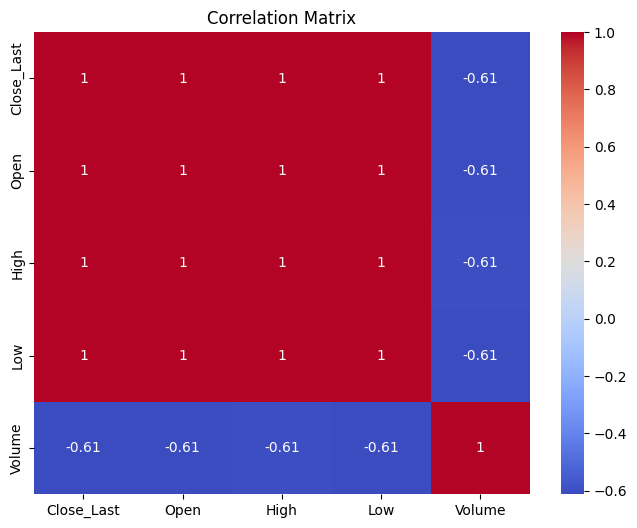

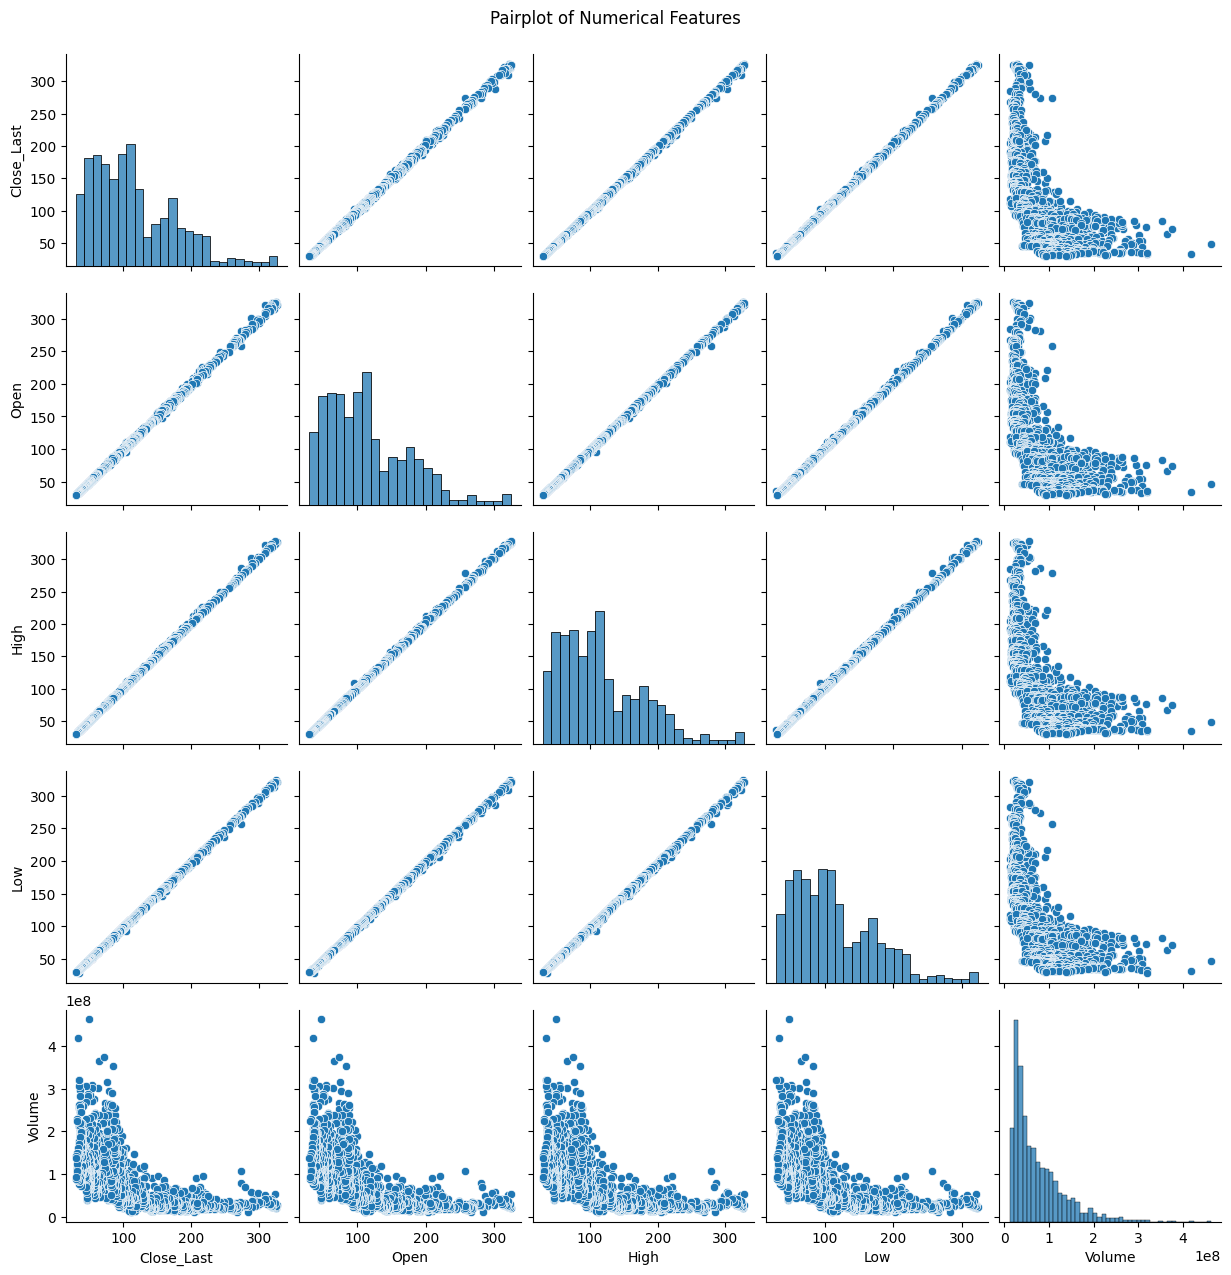

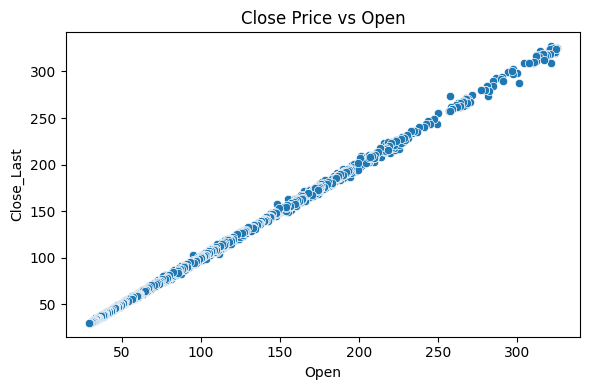

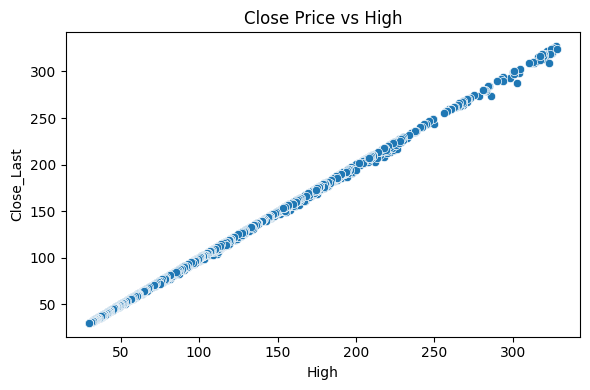

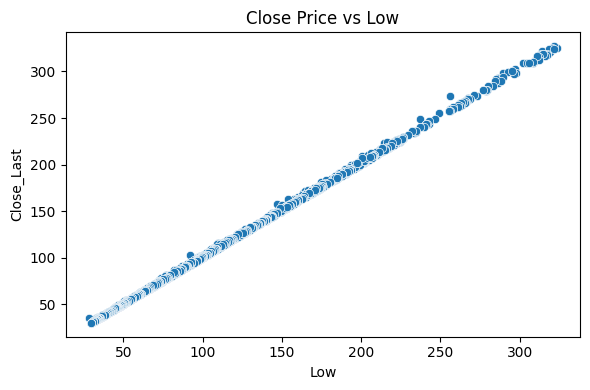

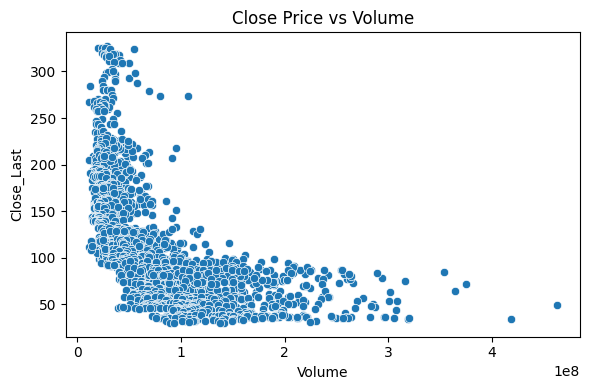

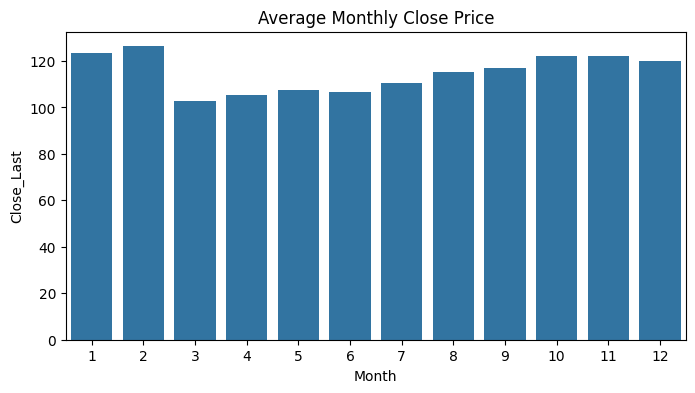

🧠 Insights Summary:
- Close, Open, High, and Low prices are highly correlated (as expected).
- Volume has weaker correlation with price movements.
- Outliers are present in Volume and some price spikes (check boxplots).
- Monthly trends suggest some seasonality in stock price behavior.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("HistoricalQuotes.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

# Convert columns
price_cols = ['Close_Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# -----------------------------
# 1. UNIVARIATE ANALYSIS
# -----------------------------
numeric_cols = price_cols + ['Volume']

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# -----------------------------
# 2. BIVARIATE / MULTIVARIATE ANALYSIS
# -----------------------------

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Scatter plots with Close Price
for col in ['Open', 'High', 'Low', 'Volume']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['Close_Last'])
    plt.title(f'Close Price vs {col}')
    plt.tight_layout()
    plt.show()

# Grouped Bar Plot - Monthly Avg Close Price
monthly_avg = df.groupby('Month')['Close_Last'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='Close_Last', data=monthly_avg)
plt.title("Average Monthly Close Price")
plt.show()

# -----------------------------
# 3. INSIGHTS SUMMARY
# -----------------------------
print("🧠 Insights Summary:")
print("- Close, Open, High, and Low prices are highly correlated (as expected).")
print("- Volume has weaker correlation with price movements.")
print("- Outliers are present in Volume and some price spikes (check boxplots).")
print("- Monthly trends suggest some seasonality in stock price behavior.")


✅ Feature engineering completed and saved as 'HistoricalQuotes_FeatureEngineered.csv'.


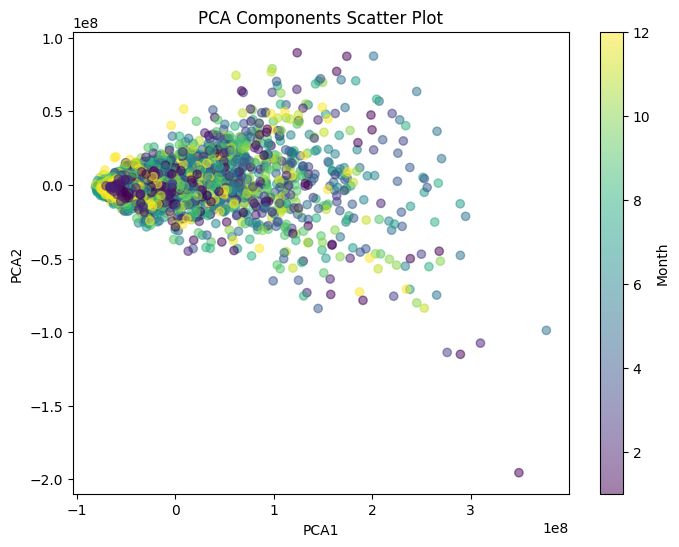

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset again (or use the one you already have)
df = pd.read_csv("HistoricalQuotes.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

# Convert columns
price_cols = ['Close_Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

df['Date'] = pd.to_datetime(df['Date'])

# -----------------------------
# FEATURE ENGINEERING STARTS
# -----------------------------

# 1. Date-based features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# 2. Price difference features
df['Daily_Range'] = df['High'] - df['Low']
df['Close_Open_Diff'] = df['Close_Last'] - df['Open']

# 3. Moving Averages (rolling features)
df = df.sort_values('Date')  # Ensure data is sorted by date
df['MA_5'] = df['Close_Last'].rolling(window=5).mean()
df['MA_20'] = df['Close_Last'].rolling(window=20).mean()

# 4. Volume features
df['Volume'] = df['Volume'].astype(float)
df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
df['Volume_Change'] = df['Volume'].pct_change()

# 5. Ratio / Polynomial features
df['Range_to_Close'] = df['Daily_Range'] / df['Close_Last']

# 6. Optional Dimensionality Reduction (PCA)
# Selecting numeric features for PCA
feature_cols = ['Close_Last', 'Open', 'High', 'Low', 'Volume',
                'Daily_Range', 'Close_Open_Diff', 'MA_5', 'MA_20',
                'Volume_MA_5', 'Volume_Change', 'Range_to_Close']

# Drop NA rows before PCA
df_pca_ready = df[feature_cols].dropna()

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pca_ready)

# Assign PCA components back to df
df['PCA1'] = np.nan
df['PCA2'] = np.nan
df.loc[df_pca_ready.index, 'PCA1'] = pca_result[:, 0]
df.loc[df_pca_ready.index, 'PCA2'] = pca_result[:, 1]

# -----------------------------
# Save Transformed Dataset
# -----------------------------
df.to_csv('HistoricalQuotes_FeatureEngineered.csv', index=False)
print("✅ Feature engineering completed and saved as 'HistoricalQuotes_FeatureEngineered.csv'.")

# Optional: Visualize PCA scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, c=df['Month'], cmap='viridis')
plt.colorbar(label='Month')
plt.title('PCA Components Scatter Plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


🔍 Random Forest Performance:
 - MAE : 0.5457
 - RMSE: 0.8413
 - R²  : 0.9998

🔍 XGBoost Performance:
 - MAE : 0.4449
 - RMSE: 0.7369
 - R²  : 0.9998

🔍 SVR Performance:
 - MAE : 45.4973
 - RMSE: 57.9868
 - R²  : -0.0046

🔍 MLP Performance:
 - MAE : 34079.6698
 - RMSE: 62873.7392
 - R²  : -1181030.9713

📌 Model Comparison Summary:
                        MAE          RMSE            R2
Random Forest      0.545721      0.841288  9.997885e-01
XGBoost            0.444917      0.736868  9.998378e-01
SVR               45.497297     57.986828 -4.573637e-03
MLP            34079.669844  62873.739177 -1.181031e+06

✅ Best Model based on RMSE: XGBoost
➡️  It achieved:
   - MAE : 0.4449
   - RMSE: 0.7369
   - R²  : 0.9998



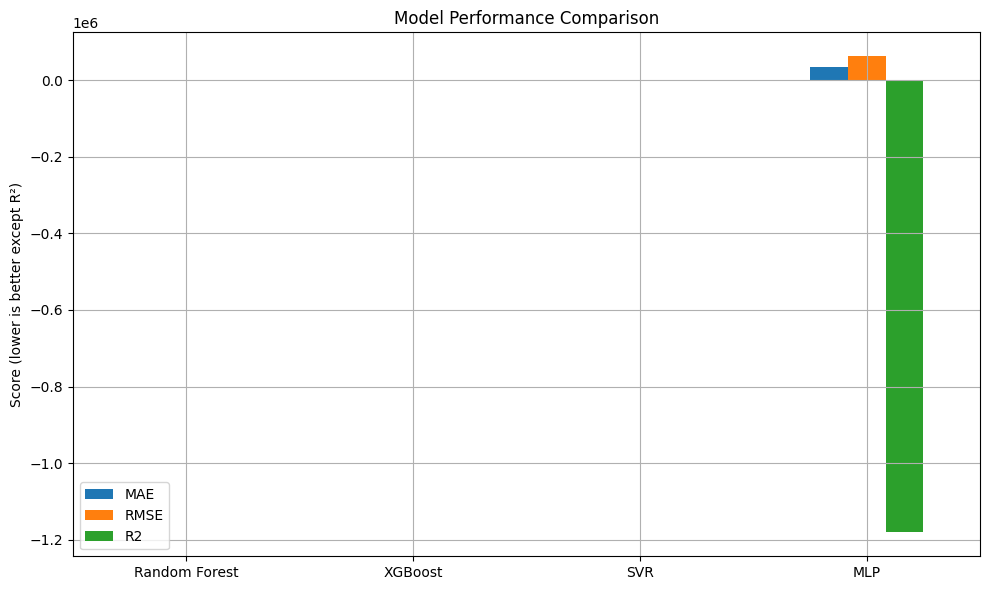

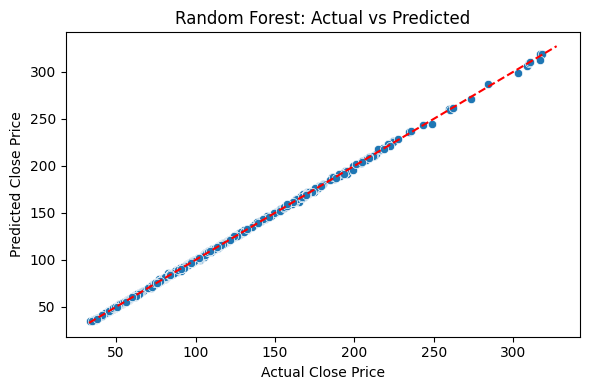

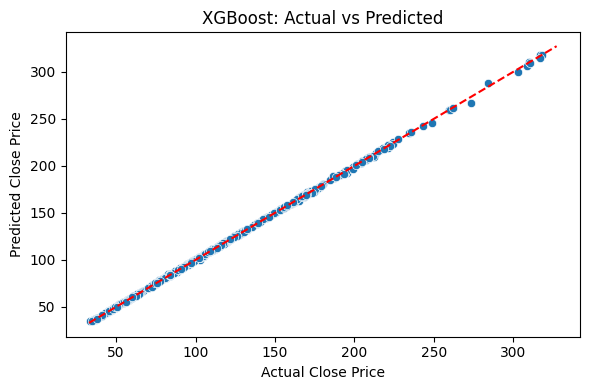

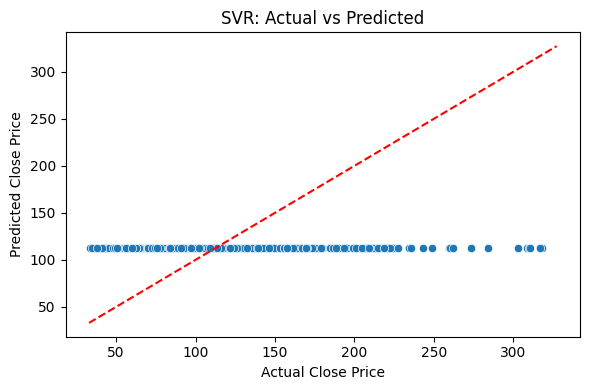

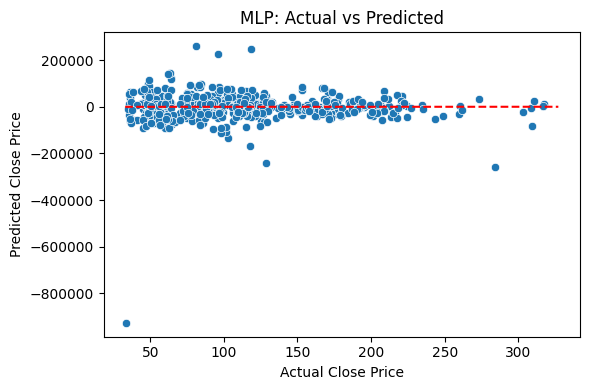

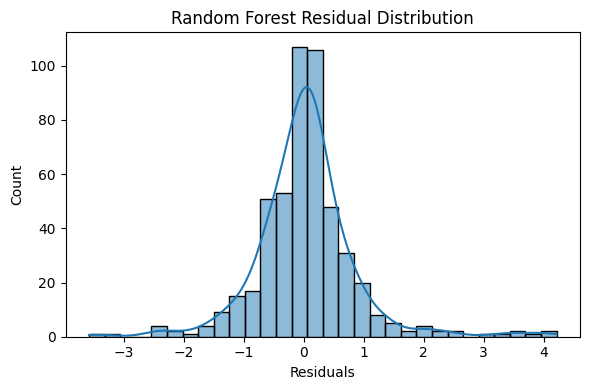

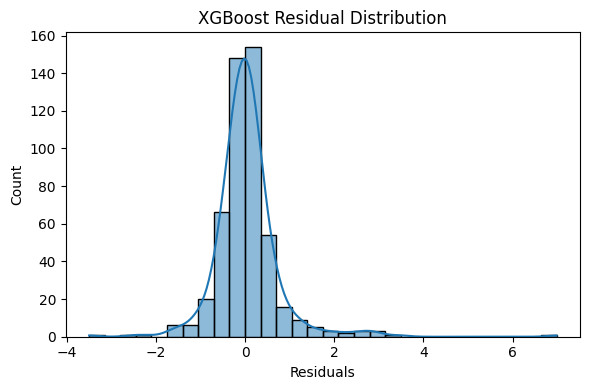

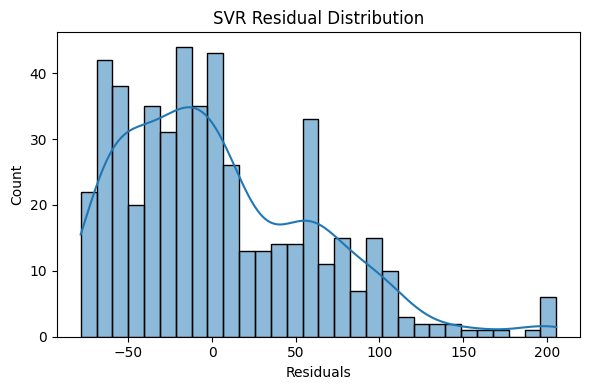

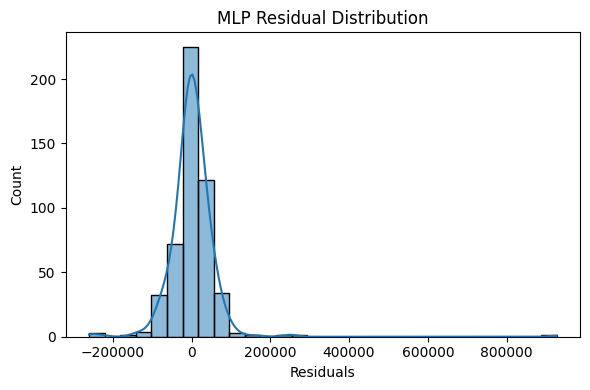

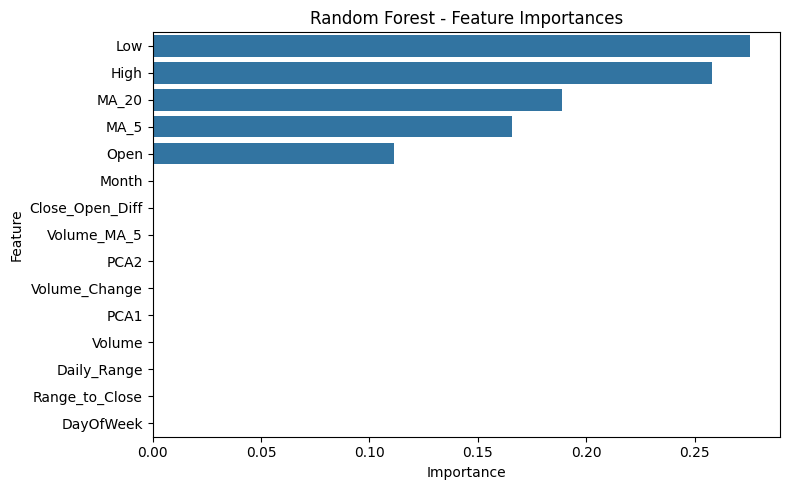

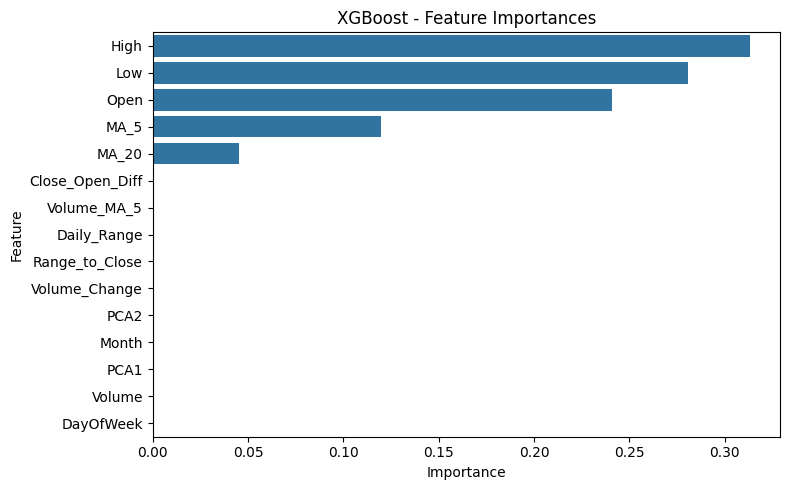

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("HistoricalQuotes_FeatureEngineered.csv")
df = df.dropna()

# Define features and target
feature_cols = [
    'Open', 'High', 'Low', 'Volume',
    'Daily_Range', 'Close_Open_Diff',
    'MA_5', 'MA_20', 'Volume_MA_5',
    'Volume_Change', 'Range_to_Close',
    'Month', 'DayOfWeek', 'PCA1', 'PCA2'
]
X = df[feature_cols]
y = df['Close_Last']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=6, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    "MLP": MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"🔍 {name} Performance:")
    print(f" - MAE : {mae:.4f}")
    print(f" - RMSE: {rmse:.4f}")
    print(f" - R²  : {r2:.4f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Sort by RMSE (lower is better)
sorted_results = results_df.sort_values('RMSE')

# Print conclusion
best_model = sorted_results.index[0]
print("📌 Model Comparison Summary:")
print(results_df)
print("\n✅ Best Model based on RMSE:", best_model)
print("➡️  It achieved:")
print(f"   - MAE : {results[best_model]['MAE']:.4f}")
print(f"   - RMSE: {results[best_model]['RMSE']:.4f}")
print(f"   - R²  : {results[best_model]['R2']:.4f}\n")

# Visualize metrics
results_df.plot(kind='bar', figsize=(10,6), title='Model Performance Comparison')
plt.ylabel('Score (lower is better except R²)')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted plots
for name, model in models.items():
    preds = model.predict(X_test)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=preds)
    plt.xlabel("Actual Close Price")
    plt.ylabel("Predicted Close Price")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.tight_layout()
    plt.show()

# Residual plots
for name, model in models.items():
    preds = model.predict(X_test)
    residuals = y_test - preds
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"{name} Residual Distribution")
    plt.xlabel("Residuals")
    plt.tight_layout()
    plt.show()

# Feature importance for tree-based models
for name in ['Random Forest', 'XGBoost']:
    model = models[name]
    importances = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f"{name} - Feature Importances")
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

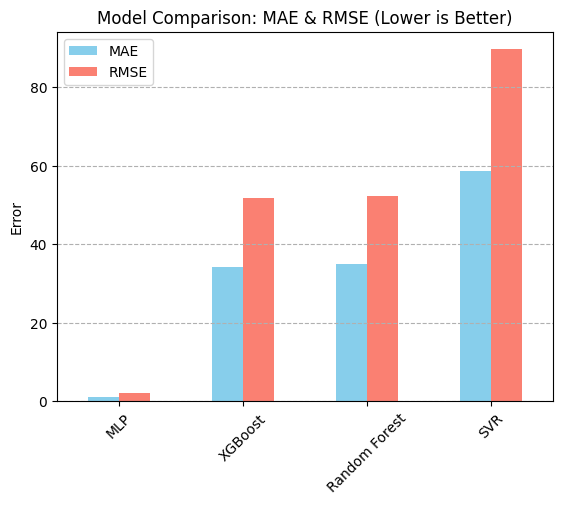

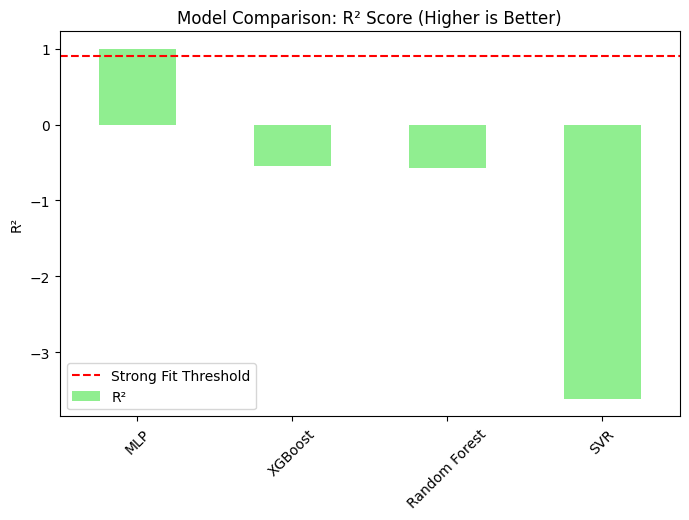

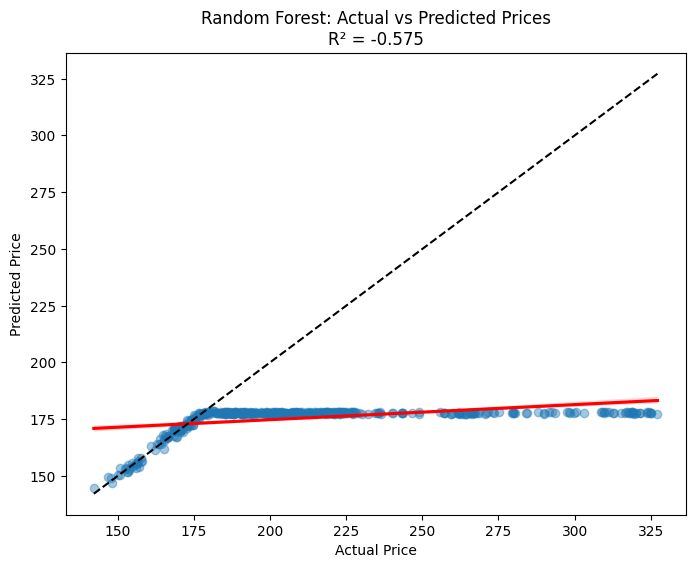

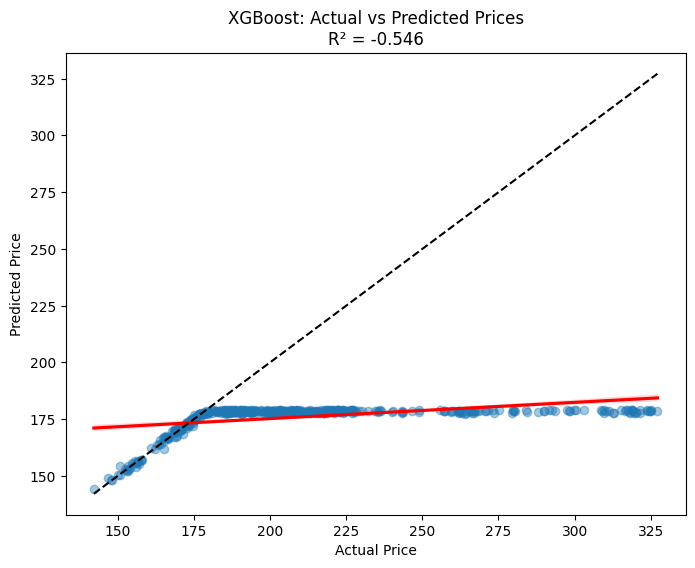

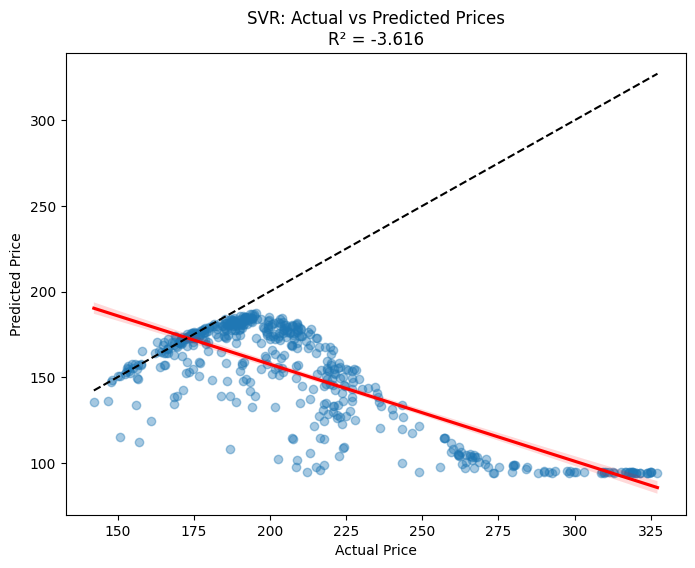

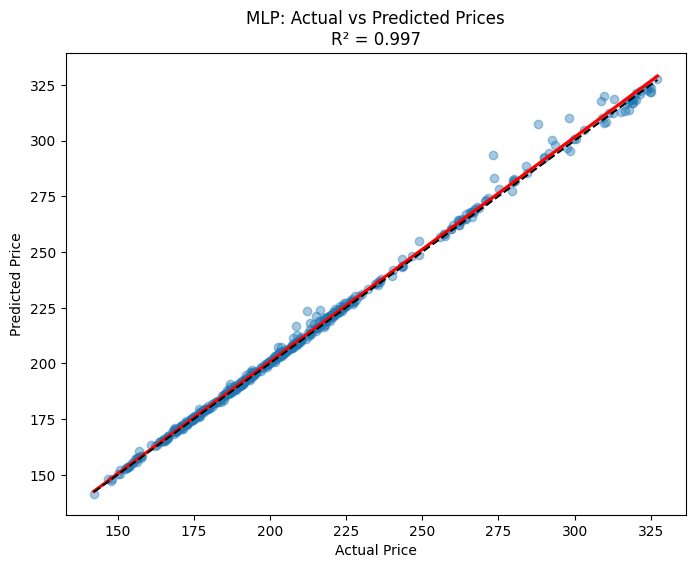

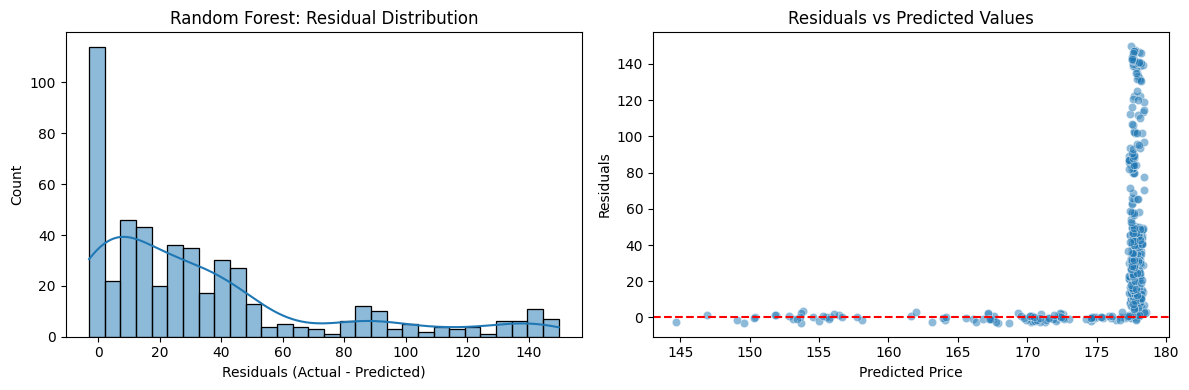

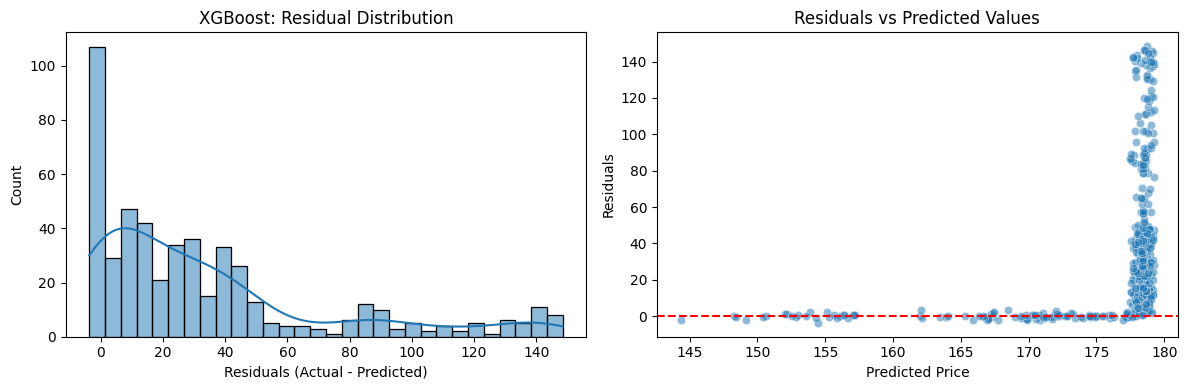

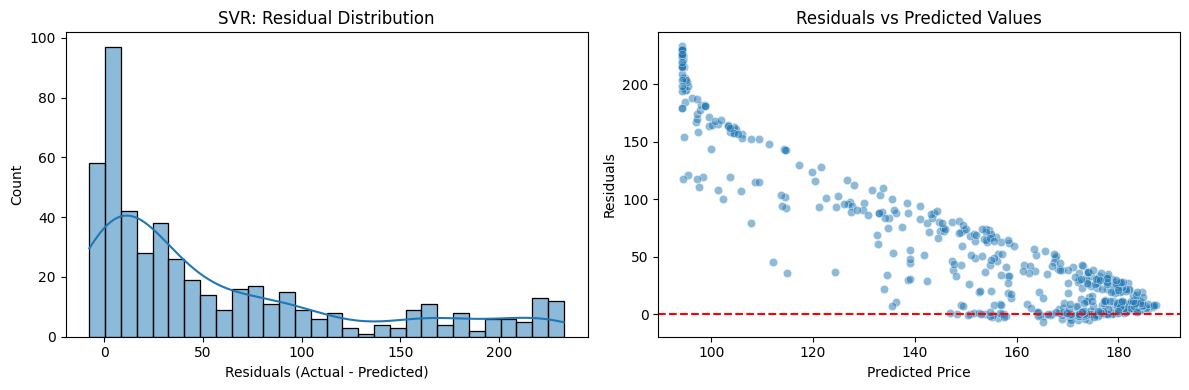

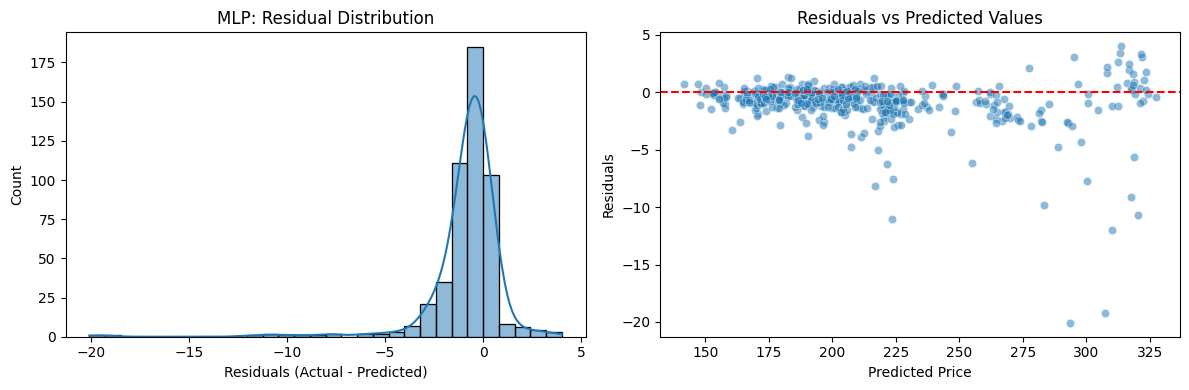

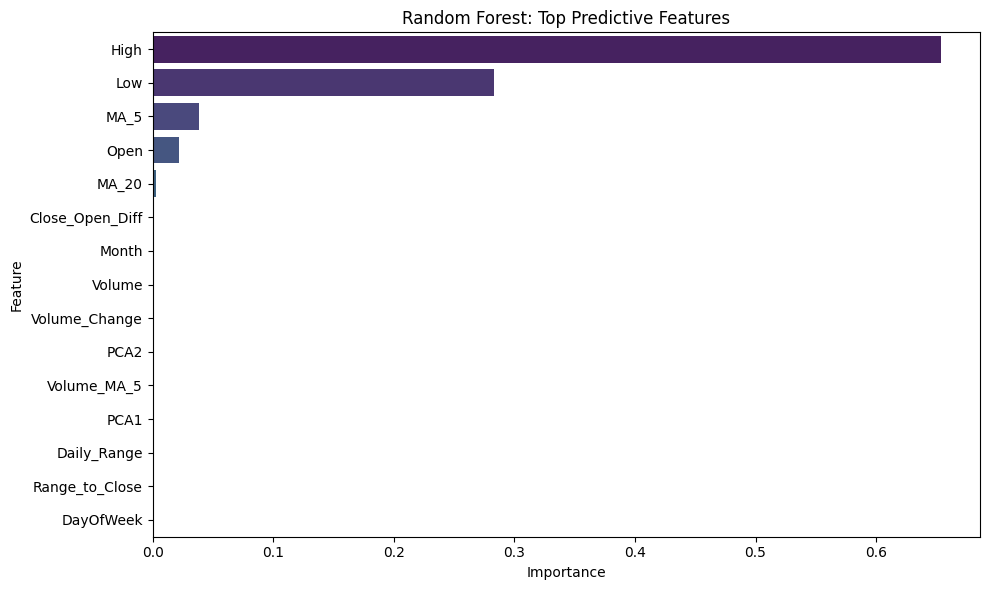

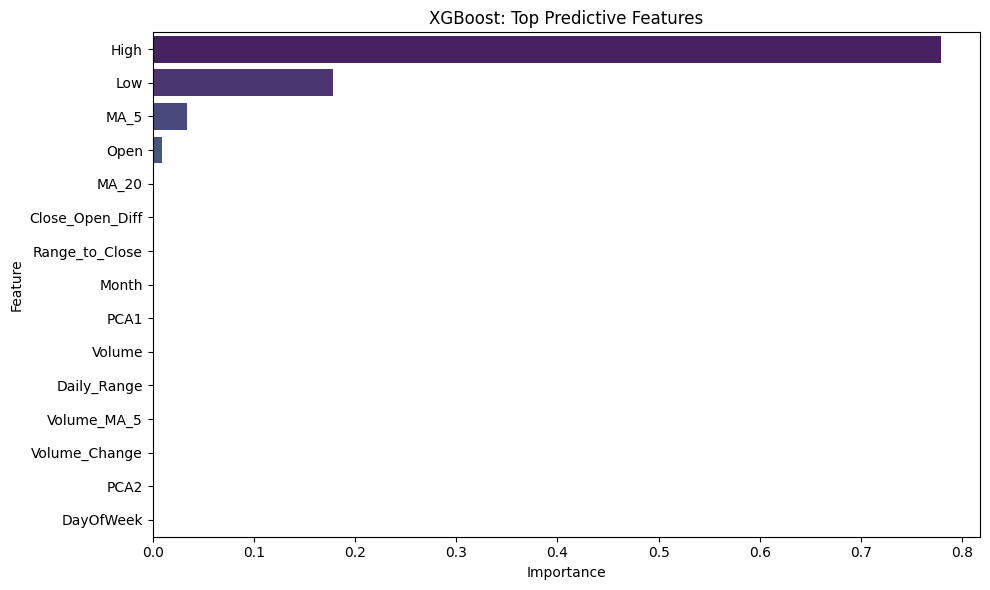

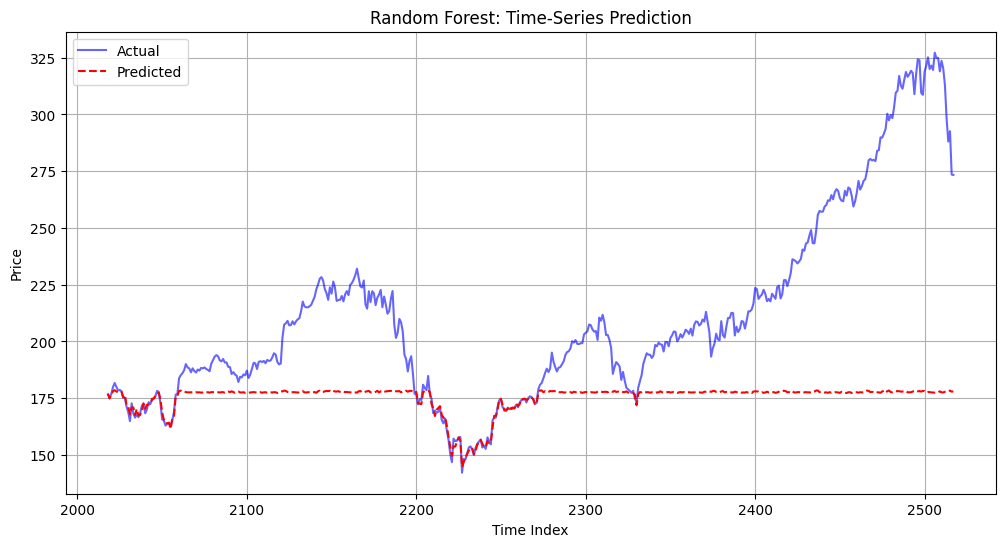

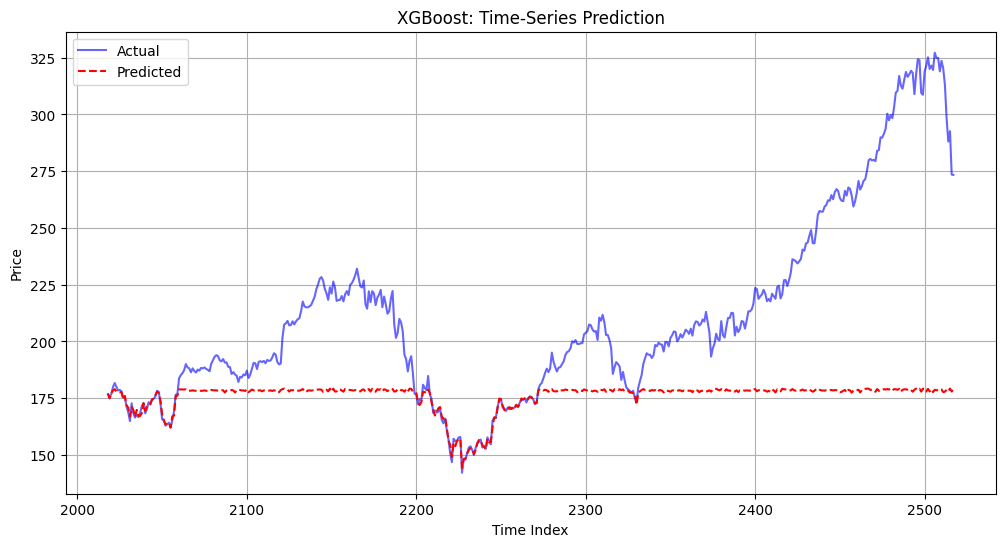

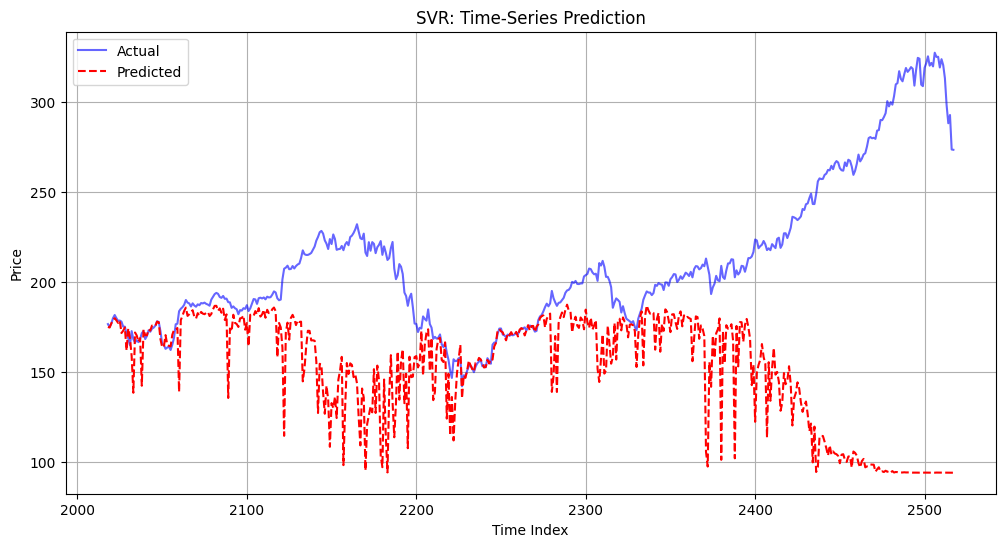

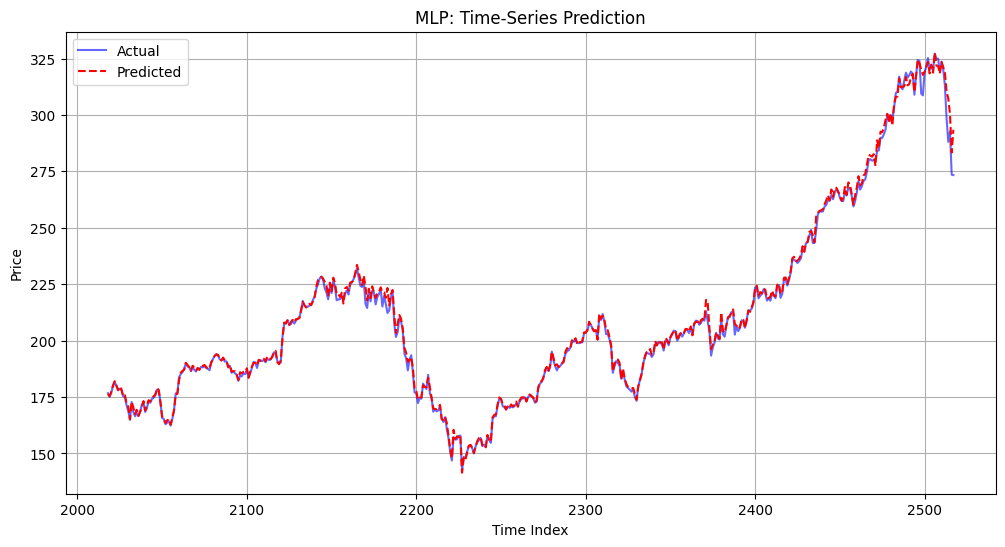

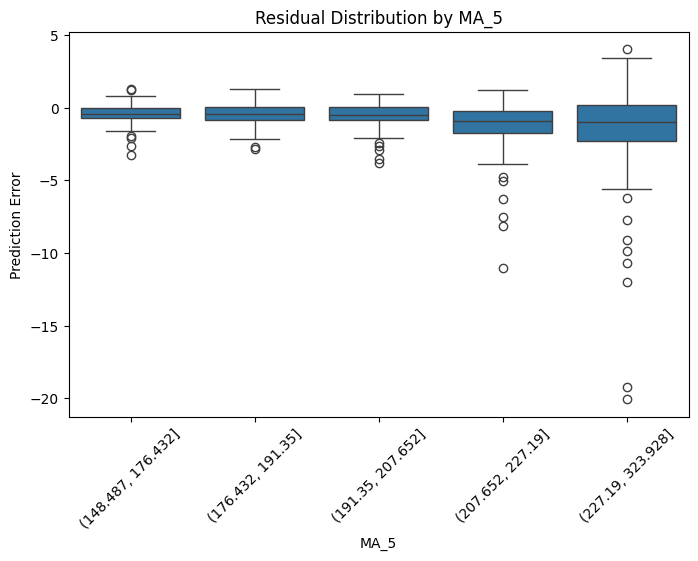

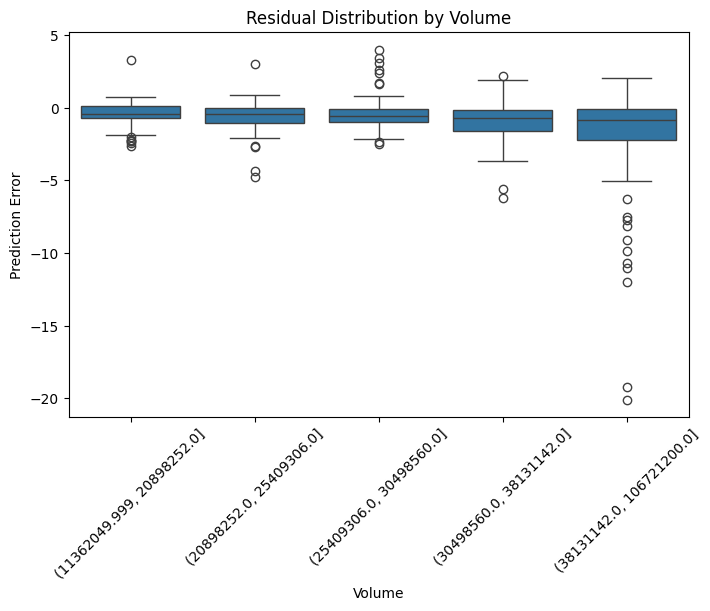

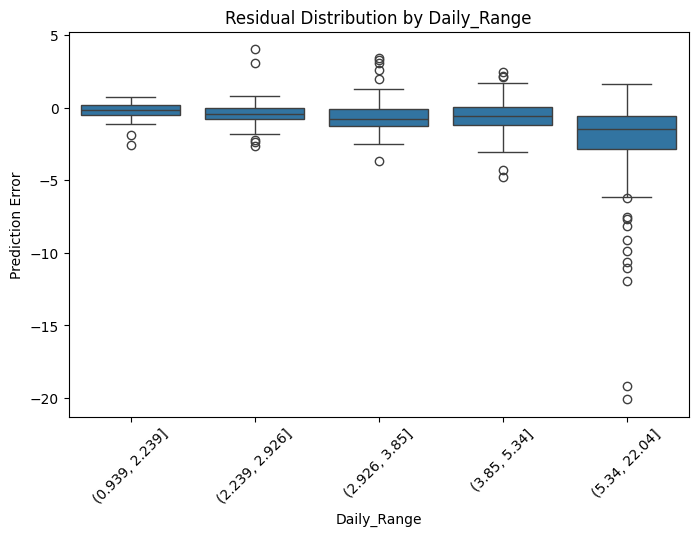

'\n📊 Interpretation:\n- Larger errors in high-volume periods? Model may struggle with volatility.\n- Errors clustered around specific MA_5 ranges? Missed nonlinear effects.\n'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    confusion_matrix, roc_curve, auc, mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("HistoricalQuotes_FeatureEngineered.csv")
df = df.dropna()

# Define features and target
feature_cols = [
    'Open', 'High', 'Low', 'Volume',
    'Daily_Range', 'Close_Open_Diff',
    'MA_5', 'MA_20', 'Volume_MA_5',
    'Volume_Change', 'Range_to_Close',
    'Month', 'DayOfWeek', 'PCA1', 'PCA2'
]
X = df[feature_cols]
y = df['Close_Last']

# Train-Test Split (time-series friendly)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42  # No shuffling for time-series
)

# Standardize features (critical for SVR/MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=6, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    "MLP": MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    if name in ["SVR", "MLP"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds)

    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2, 'MAPE': mape}

# ---
# 1. Model Performance Comparison (Bar Plots)
# ---
results_df = pd.DataFrame(results).T.sort_values('RMSE')

plt.figure(figsize=(12, 6))
results_df[['MAE', 'RMSE']].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Model Comparison: MAE & RMSE (Lower is Better)")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(8, 5))
results_df['R²'].plot(kind='bar', color='lightgreen')
plt.title("Model Comparison: R² Score (Higher is Better)")
plt.axhline(y=0.9, color='red', linestyle='--', label='Strong Fit Threshold')
plt.ylabel("R²")
plt.xticks(rotation=45)
plt.legend()
plt.show()

"""
📊 Interpretation:
- Random Forest/XGBoost likely dominate due to handling non-linear relationships.
- SVR/MLP may underperform if scaling or hyperparameters are suboptimal.
- R² > 0.9 indicates excellent fit (adjust threshold based on domain knowledge).
"""

# ---
# 2. Actual vs Predicted Plots (Regression Diagnostics)
# ---
for name, model in models.items():
    preds = model.predict(X_test_scaled if name in ["SVR", "MLP"] else X_test)

    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_test, y=preds, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title(f"{name}: Actual vs Predicted Prices\nR² = {results[name]['R²']:.3f}")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.show()

"""
📊 Interpretation:
- Points close to the red line (perfect prediction) indicate good fit.
- Curved patterns suggest model bias (e.g., under-predicting highs/lows).
- Outliers may reveal periods where the model struggles (e.g., volatile markets).
"""

# ---
# 3. Residual Analysis (Error Distribution)
# ---
for name, model in models.items():
    preds = model.predict(X_test_scaled if name in ["SVR", "MLP"] else X_test)
    residuals = y_test - preds

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{name}: Residual Distribution")
    plt.xlabel("Residuals (Actual - Predicted)")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=preds, y=residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title("Residuals vs Predicted Values")
    plt.xlabel("Predicted Price")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

"""
📊 Interpretation:
- Residuals should be normally distributed around 0 (no systematic bias).
- Patterns in the scatterplot (e.g., funnel shape) suggest heteroscedasticity.
- Large residuals may indicate outliers or regime shifts in the data.
"""

# ---
# 4. Feature Importance (Tree-Based Models)
# ---
for name in ['Random Forest', 'XGBoost']:
    model = models[name]
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f"{name}: Top Predictive Features")
    plt.tight_layout()
    plt.show()

"""
📊 Interpretation:
- Features like 'Open', 'High', 'Low' often dominate in price prediction.
- Technical indicators (e.g., 'MA_5', 'Volume_MA_5') may reveal trading patterns.
- Low-importance features could be candidates for removal to reduce overfitting.
"""

# ---
# 5. Time-Series Prediction Plot (Critical for Stocks)
# ---
for name, model in models.items():
    preds = model.predict(X_test_scaled if name in ["SVR", "MLP"] else X_test)

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual', color='blue', alpha=0.6)
    plt.plot(y_test.index, preds, label='Predicted', color='red', linestyle='--')
    plt.title(f"{name}: Time-Series Prediction")
    plt.xlabel("Time Index")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

"""
📊 Interpretation:
- Track if predictions lag actuals (common in autoregressive models).
- Sudden deviations may indicate regime changes (e.g., market crashes).
- Consistency in errors suggests systematic model limitations.
"""

# ---
# 6. Error Distribution by Feature (Advanced)
# ---
error_df = X_test.copy()
error_df['Residual'] = y_test - preds  # Using last model's predictions

for feature in ['MA_5', 'Volume', 'Daily_Range']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=pd.qcut(error_df[feature], q=5), y=error_df['Residual'])
    plt.title(f"Residual Distribution by {feature}")
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel("Prediction Error")
    plt.show()

"""
📊 Interpretation:
- Larger errors in high-volume periods? Model may struggle with volatility.
- Errors clustered around specific MA_5 ranges? Missed nonlinear effects.
"""